In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
import keras

In [43]:
data = pd.read_csv("social.csv")

In [44]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [45]:
data = data.iloc[:,1:]

In [46]:
data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [47]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


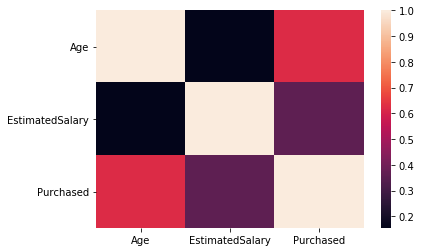

In [49]:
sns.heatmap(data.corr())

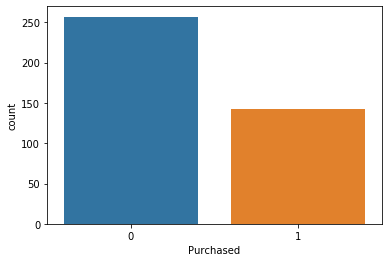

In [50]:
sns.countplot(x="Purchased",data=data)

In [51]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [52]:
x = data.iloc[:,:3]
y = data.iloc[:,3].values

In [53]:
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [54]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

## In this way we can OneHotEncode any column

ct = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder="passthrough")
x = np.array(ct.fit_transform(x),dtype=np.str)

In [55]:
labelencoder = LabelEncoder()
ohe = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')
x["Gender"] = labelencoder.fit_transform(x["Gender"])
x = ohe.fit_transform(x)

In [56]:
print(x.shape)

(400, 162)


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
log = Sequential()

log.add(Dense(64,kernel_initializer="uniform",activation="relu",input_shape=(162,)))
log.add(Dense(32,kernel_initializer='uniform',activation="relu"))
log.add(Dense(16,kernel_initializer='uniform',activation="relu"))
log.add(Dense(1,activation="sigmoid"))

log.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

log.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                10432     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = log.fit(x_train,y_train,epochs=500,batch_size=10)

Epoch 1/500
320/320 [==============================] - 0s 424us/step - loss: 0.6905 - accuracy: 0.6125
Epoch 2/500
320/320 [==============================] - 0s 112us/step - loss: 0.6703 - accuracy: 0.6406
Epoch 3/500
320/320 [==============================] - 0s 125us/step - loss: 0.5980 - accuracy: 0.6406
Epoch 4/500
320/320 [==============================] - 0s 137us/step - loss: 0.4887 - accuracy: 0.6406
Epoch 5/500
320/320 [==============================] - 0s 146us/step - loss: 0.4009 - accuracy: 0.8031
Epoch 6/500
320/320 [==============================] - 0s 156us/step - loss: 0.3435 - accuracy: 0.9187
Epoch 7/500
320/320 [==============================] - 0s 134us/step - loss: 0.2919 - accuracy: 0.9438
Epoch 8/500
320/320 [==============================] - 0s 112us/step - loss: 0.2357 - accuracy: 0.9500
Epoch 9/500
320/320 [==============================] - 0s 106us/step - loss: 0.1837 - accuracy: 0.9625
Epoch 10/500
320/320 [==============================] - 0s 100us/step - l

320/320 [==============================] - 0s 84us/step - loss: 0.0085 - accuracy: 0.9937
Epoch 81/500
320/320 [==============================] - 0s 87us/step - loss: 0.0095 - accuracy: 0.9937
Epoch 82/500
320/320 [==============================] - 0s 81us/step - loss: 0.0081 - accuracy: 0.9969
Epoch 83/500
320/320 [==============================] - 0s 87us/step - loss: 0.0059 - accuracy: 0.9969
Epoch 84/500
320/320 [==============================] - 0s 84us/step - loss: 0.0103 - accuracy: 0.9969
Epoch 85/500
320/320 [==============================] - 0s 84us/step - loss: 0.0045 - accuracy: 0.9969
Epoch 86/500
320/320 [==============================] - 0s 84us/step - loss: 0.0118 - accuracy: 0.9937
Epoch 87/500
320/320 [==============================] - 0s 81us/step - loss: 0.0100 - accuracy: 0.9937
Epoch 88/500
320/320 [==============================] - 0s 87us/step - loss: 0.0073 - accuracy: 0.9969
Epoch 89/500
320/320 [==============================] - 0s 109us/step - loss: 0.0064 -

320/320 [==============================] - 0s 97us/step - loss: 0.0060 - accuracy: 0.9969
Epoch 159/500
320/320 [==============================] - 0s 100us/step - loss: 0.0054 - accuracy: 0.9969
Epoch 160/500
320/320 [==============================] - 0s 103us/step - loss: 0.0066 - accuracy: 0.9937
Epoch 161/500
320/320 [==============================] - 0s 94us/step - loss: 0.0075 - accuracy: 0.9969
Epoch 162/500
320/320 [==============================] - 0s 94us/step - loss: 0.0087 - accuracy: 0.9937
Epoch 163/500
320/320 [==============================] - 0s 84us/step - loss: 0.0102 - accuracy: 0.9969
Epoch 164/500
320/320 [==============================] - 0s 87us/step - loss: 0.0049 - accuracy: 0.9969
Epoch 165/500
320/320 [==============================] - 0s 87us/step - loss: 0.0077 - accuracy: 0.9969
Epoch 166/500
320/320 [==============================] - 0s 87us/step - loss: 0.0047 - accuracy: 0.9969
Epoch 167/500
320/320 [==============================] - 0s 90us/step - loss

320/320 [==============================] - 0s 87us/step - loss: 0.0080 - accuracy: 0.9937
Epoch 237/500
320/320 [==============================] - 0s 84us/step - loss: 0.0089 - accuracy: 0.9969
Epoch 238/500
320/320 [==============================] - 0s 84us/step - loss: 0.0046 - accuracy: 0.9969
Epoch 239/500
320/320 [==============================] - 0s 84us/step - loss: 0.0053 - accuracy: 0.9937
Epoch 240/500
320/320 [==============================] - 0s 81us/step - loss: 0.0061 - accuracy: 0.9969
Epoch 241/500
320/320 [==============================] - 0s 81us/step - loss: 0.0056 - accuracy: 0.9969
Epoch 242/500
320/320 [==============================] - 0s 81us/step - loss: 0.0048 - accuracy: 0.9937
Epoch 243/500
320/320 [==============================] - 0s 81us/step - loss: 0.0066 - accuracy: 0.9969
Epoch 244/500
320/320 [==============================] - 0s 81us/step - loss: 0.0072 - accuracy: 0.9937
Epoch 245/500
320/320 [==============================] - 0s 81us/step - loss: 

320/320 [==============================] - 0s 103us/step - loss: 0.0049 - accuracy: 0.9969
Epoch 315/500
320/320 [==============================] - 0s 97us/step - loss: 0.0053 - accuracy: 0.9969
Epoch 316/500
320/320 [==============================] - 0s 90us/step - loss: 0.0051 - accuracy: 0.9937
Epoch 317/500
320/320 [==============================] - 0s 87us/step - loss: 0.0057 - accuracy: 0.9937
Epoch 318/500
320/320 [==============================] - 0s 84us/step - loss: 0.0050 - accuracy: 0.9937
Epoch 319/500
320/320 [==============================] - 0s 90us/step - loss: 0.0044 - accuracy: 0.9969
Epoch 320/500
320/320 [==============================] - 0s 97us/step - loss: 0.0055 - accuracy: 0.9937
Epoch 321/500
320/320 [==============================] - 0s 90us/step - loss: 0.0051 - accuracy: 0.9969
Epoch 322/500
320/320 [==============================] - 0s 87us/step - loss: 0.0052 - accuracy: 0.9969
Epoch 323/500
320/320 [==============================] - 0s 90us/step - loss:

320/320 [==============================] - 0s 81us/step - loss: 0.0053 - accuracy: 0.9969
Epoch 393/500
320/320 [==============================] - 0s 81us/step - loss: 0.0047 - accuracy: 0.9969
Epoch 394/500
320/320 [==============================] - 0s 81us/step - loss: 0.0055 - accuracy: 0.9937
Epoch 395/500
320/320 [==============================] - 0s 81us/step - loss: 0.0046 - accuracy: 0.9969
Epoch 396/500
320/320 [==============================] - 0s 84us/step - loss: 0.0044 - accuracy: 0.9969
Epoch 397/500
320/320 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.9969
Epoch 398/500
320/320 [==============================] - 0s 87us/step - loss: 0.0045 - accuracy: 0.9969
Epoch 399/500
320/320 [==============================] - 0s 87us/step - loss: 0.0052 - accuracy: 0.9937
Epoch 400/500
320/320 [==============================] - 0s 81us/step - loss: 0.0045 - accuracy: 0.9969
Epoch 401/500
320/320 [==============================] - 0s 81us/step - loss: 

320/320 [==============================] - 0s 84us/step - loss: 0.0049 - accuracy: 0.9969
Epoch 471/500
320/320 [==============================] - 0s 87us/step - loss: 0.0047 - accuracy: 0.9969
Epoch 472/500
320/320 [==============================] - 0s 97us/step - loss: 0.0049 - accuracy: 0.9937
Epoch 473/500
320/320 [==============================] - 0s 93us/step - loss: 0.0046 - accuracy: 0.9937
Epoch 474/500
320/320 [==============================] - 0s 90us/step - loss: 0.0050 - accuracy: 0.9969
Epoch 475/500
320/320 [==============================] - 0s 97us/step - loss: 0.0048 - accuracy: 0.9937
Epoch 476/500
320/320 [==============================] - 0s 90us/step - loss: 0.0054 - accuracy: 0.9937
Epoch 477/500
320/320 [==============================] - 0s 84us/step - loss: 0.0047 - accuracy: 0.9969
Epoch 478/500
320/320 [==============================] - 0s 84us/step - loss: 0.0045 - accuracy: 0.9969
Epoch 479/500
320/320 [==============================] - 0s 90us/step - loss: 

In [62]:
import matplotlib.pyplot as plt

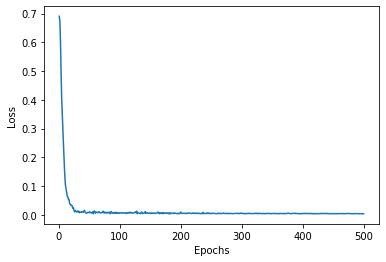

In [63]:
epoch_count = range(1,len(history.history["loss"])+1)

plt.plot(epoch_count,history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

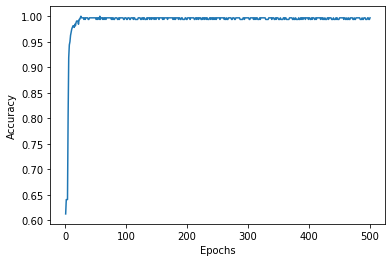

In [64]:
plt.plot(epoch_count,history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [65]:
y_pred = log.predict_classes(x_test)

In [66]:
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

In [67]:
accuracy_score(y_test,y_pred)

0.8625

In [68]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.90        52\n           1       0.81      0.79      0.80        28\n\n    accuracy                           0.86        80\n   macro avg       0.85      0.84      0.85        80\nweighted avg       0.86      0.86      0.86        80\n'

In [69]:
confusion_matrix(y_test,y_pred)

array([[47,  5],
       [ 6, 22]], dtype=int64)

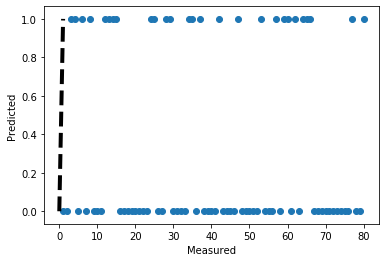

In [88]:
fig, ax = plt.subplots()
ax.scatter(range(1,len(y_pred)+1), y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Here we make the predictions:-

In [71]:
x_pred2 = np.array([1,19,41065]).reshape(1,-1)
x_pred2 = ohe.transform(x_pred2)
y_pred2 = log.predict_classes(x_pred2)
print(*y_pred2)

[0]
